In [1]:
function armington(S::Integer, σ::Integer, L::Vector,  A::Vector, τ::Matrix, ν=.05, tol0 = 10e-7)

    w = rand(S)
    w = w ./ w[1]
    diff0 = 10^2
    MatCost = zeros(S,S)

    while diff0 > tol0

        # Rows (i) are origins, destinations (j) are columns
        MatCost = ( w ./ A .* τ) .^ (1-σ)

        # Trade volumes = Cost(i,j)^(1-σ) * (w(j) * L(j)  / P(j)
        Numerator = MatCost .* w' .* L' # repeat(w', S, 1) .* repeat(L', S, 1) are equal for every destination
        Denominator = sum(MatCost, dims=1) # Prices are also specific to each destination, summing costs from every origin (i) -- dims=1 denote summing across rows

        # Income at origin (i) sums across all destinations (j) -- dims=2 denote summing across columns
        Income = sum(Numerator ./ Denominator, dims=2)

        # Excess demand function
        z = (Income .- w.*L) ./ (w.*L)
      
        # Update guess
        w_n = w .* ( 1 .+ ν .* z )
        
        # See difference between new implied wage and previous guess
        diff0 = maximum( abs.(w - w_n) )

        # Normalize updated guess
        w = w_n ./ w_n[1]
    end

    return w
end

armington (generic function with 3 methods)

In [3]:
using LinearAlgebra

S = 10;
σ = 2;
L = ones(S);
A = vcat(LinRange(1,10,S)...);

In [4]:
# No trade costs
τ = ones(S,S);
wr = armington(S, σ, L,  A, τ);
MC = ( wr ./ A .* τ) .^ (1-σ);
π = MC ./ repeat( sum(MC, dims=1), S, 1);
P = sum(MC, dims=1) .^ (1/(1-σ));

In [5]:
# New \tau
τ2 = ones(S,S).*2 .- I(S).*(2) .+ I(S);
wr2 = armington(S, σ, L,  A, τ2);
MC2 = ( repeat(wr2,1,S) .* τ2 ./ repeat(A,1,S) ) .^ (1-σ);
π2 = MC2 ./ repeat( sum(MC2, dims=1), S, 1);
P2 = sum(MC2, dims=1) .^ (1/(1-σ));

In [7]:
# Calculate wefare in each scenario and compare with analytical solution

println( abs.( ( wr ./ P' ) ./ ( wr2 ./ P2') .-  ( diag(π) ./ diag(π2) ) .^ (1/(1-σ)) ) )

[2.220446049250313e-16; 0.0; 2.220446049250313e-16; 2.220446049250313e-16; 0.0; 4.440892098500626e-16; 4.440892098500626e-16; 2.220446049250313e-16; 2.220446049250313e-16; 2.220446049250313e-16]


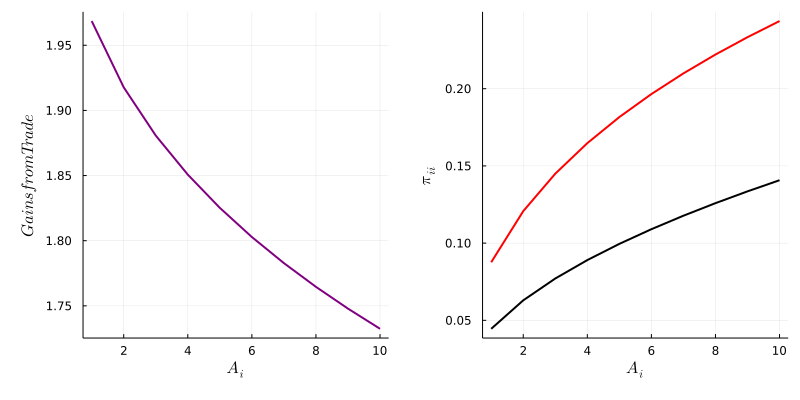

In [8]:
using Plots
using LaTeXStrings

gr(display_type=:inline)
fig = plot(layout=(1,2), size=(800,400))
# Left hand side
plot!(A, ( diag(π) ./ diag(π2) ) .^ (1/(1-σ)),
     color=:purple,
     linewidth=2,
     legend=false,
     xlabel=latexstring(raw"A_i"),
     ylabel=latexstring(raw"Gains from Trade"),
     sp=1,
     left_margin = 7Plots.mm,
     bottom_margin = 7Plots.mm)
# Right hand side
plot!(A, diag(π),
          color=:black,
          linewidth=2,
          legend=false,
          xlabel=latexstring(raw"A_i"),
          ylabel=latexstring(raw"\pi_{ii}"),
          sp=2,
          left_margin = 7Plots.mm,
          bottom_margin = 7Plots.mm)     
plot!(A, diag(π2),
          color=:red,
          linewidth=2,
          legend=false,
          sp=2,
          left_margin = 7Plots.mm,
          bottom_margin = 7Plots.mm)     